<a href="https://colab.research.google.com/github/Paty-travagin/Blog_Data_Science/blob/master/An%C3%A1lise_C%C3%A2ncer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados de pessoas com Câncer.






### Importando Bibliotecas

In [ ]:

!pip install openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from openpyxl import load_workbook
import matplotlib.pyplot as plt


### Abrindo o arquivo csv

In [ ]:
data = pd.read_excel('/content/cancer patient data sets.xlsx')


In [ ]:
data.head(5)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### Verificando o tipo de dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

#### Verificando valores nulos

In [ ]:
data.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### Relação entre idade e nivel do câncer 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Level')

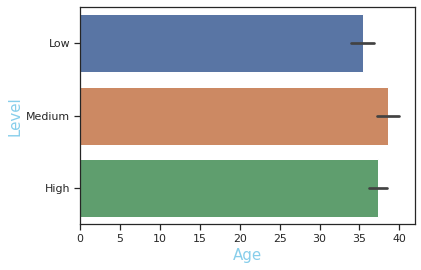

In [ ]:
X = data["Age"].values
Y = data["Level"].values
line_plot = sns.barplot(X,Y)
line_plot.set_xlabel("Age", fontsize = 15,color="skyblue")
line_plot.set_ylabel("Level", fontsize = 15,color="skyblue")

### Relação entre Idade & smoking(Fumar)

##### Analisando o gráfico acima percebe que pessoas a partir dos 
##### 36 anos tem câncer nivel Medium e High.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Smoking')

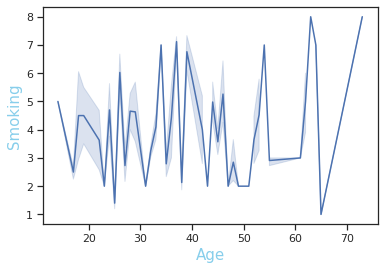

In [ ]:
X = data["Age"].values
Y = data["Smoking"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Age", fontsize = 15,color="skyblue")
line_plot.set_ylabel("Smoking", fontsize = 15,color="skyblue")

Sobre o gráfico acima, pessoas entre 30 e 40 anos e pessoas a partir dos 60 fumam mais.

#### risco generico x idade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Genetic Risk')

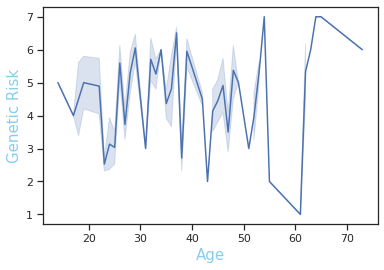

In [ ]:

X = data["Age"].values
Y = data["Genetic Risk"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Age", fontsize = 15,color="skyblue")
line_plot.set_ylabel("Genetic Risk", fontsize = 15,color="skyblue")

#####  Sobre o gráfico acima, Pessoas acima de 55 anos tem um risco generico mais alto.

### Age & Fatigue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Fatigue')

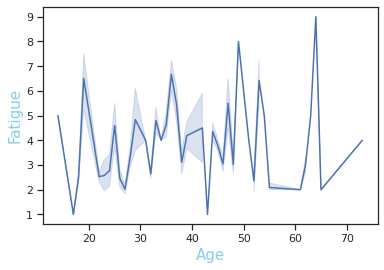

In [ ]:
X = data["Age"].values
Y = data["Fatigue"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Age", fontsize = 15,color="skyblue")
line_plot.set_ylabel("Fatigue", fontsize = 15,color="skyblue")

#### Sobre o gráfico acima, pessoas à partir dos 54 anos sofrem mais com Fatigue.

#### Age & Alcohol use

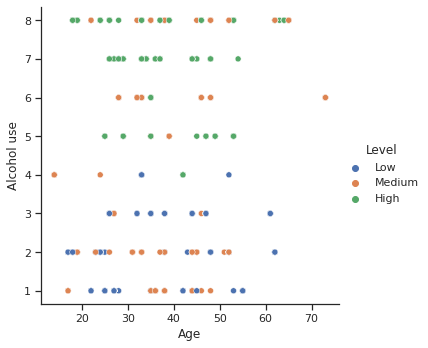

In [ ]:
sns.relplot(x="Age",y="Alcohol use", data=data, hue="Level")

#### Analisando o gráfic acima, percebe que, pessoas que usam muito alcohol 
#### tem cânçer High.

### Age & Alcohol & Gender

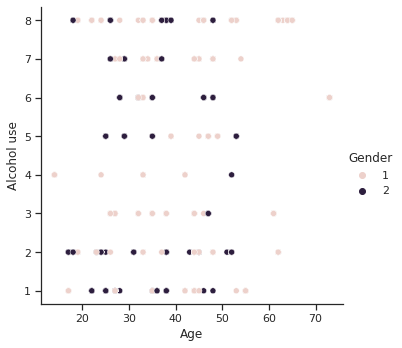

In [ ]:
sns.relplot(x="Age",y="Alcohol use", data=data, hue="Gender")

### Calculando a média do level/ plotando um grafico 

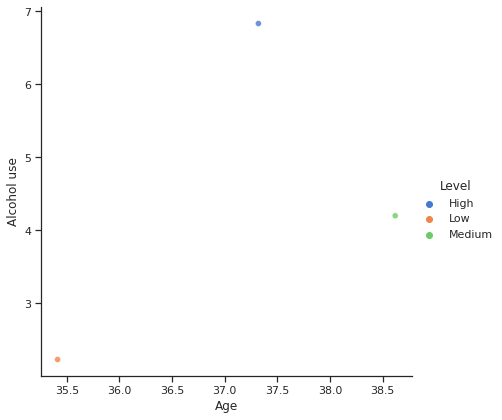

In [ ]:
mediun_level = data.groupby("Level").mean()
sns.relplot(x="Age", y="Alcohol use",data= mediun_level,hue="Level", alpha =0.8, palette="muted", height = 6)

#### Sobre o gráfico acima, diz que, pessoas com level Low, tem média de 37 anos.

### media de level x falta de ar

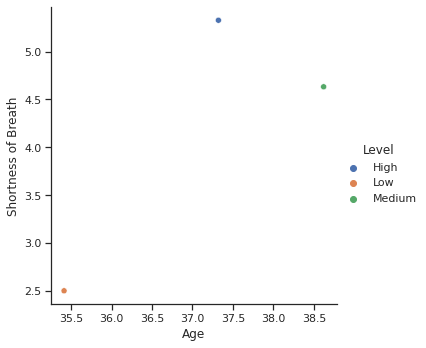

In [ ]:
# media d level x falta de ar
grouped_by_level = data.groupby("Level").mean()
sns.relplot(x="Age", y="Shortness of Breath",data= grouped_by_level,hue="Level")

#### Sobre o gráfico acima, as pessoas com Level LOW e MEDIUM sofrem de falta de ar.